In [7]:
import json
import pandas as pd

In [3]:
with open("backtest_parameters.json") as f:
  params = json.load(f)
params

{'backtest_name': 'backtest_1',
 'start_date': '2018-01-01',
 'end_date': '2018-01-31',
 'fred_api_key': '../fredapikey.txt',
 'datapath_file': '../fred_data/',
 'fred_datasets': [{'series_id': 'A31ANO', 'lead_lag': -2},
  {'series_id': 'PCU4299304299301', 'lead_lag': -10}],
 'model_file': 'models/model.py',
 'model_class_name': 'Model',
 'model_params': {'n_estimators': 100, 'max_depth': 3}}

In [4]:
from fredapi import Fred
fred = Fred("4c4a3038f5f574167576ab71712fabbb")

<AxesSubplot:>

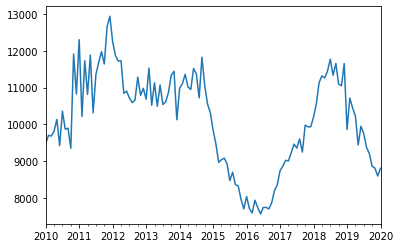

In [5]:
fred.get_series("A31ANO", observation_start="2010-01-01", observation_end="2020-01-01").plot()

In [29]:
df1 = pd.read_csv("../fred_data/A31ANO.csv", index_col=False)
df2 = pd.read_csv("../fred_data/PIORECRUSDM.csv", index_col=False)

In [30]:
df1

,Year,Week,Value,Year-Week
0,2008,1,12805.0,2008-1
1,2008,2,12833.0,2008-2
2,2008,3,12861.0,2008-3
3,2008,4,12889.0,2008-4
4,2008,5,12917.0,2008-5
...,...,...,...,...
806,2023,27,14795.2,2023-27
807,2023,28,14773.4,2023-28
808,2023,29,14751.6,2023-29
809,2023,30,14729.8,2023-30


In [31]:
pd.merge(df1[["Year-Week", "Value"]], df2[["Year-Week", "Value"]], on="Year-Week")

,Year-Week,Value_x,Value_y
0,2008-1,12805.0,60.8000
1,2008-2,12833.0,60.8000
2,2008-3,12861.0,60.8000
3,2008-4,12889.0,60.8000
4,2008-5,12917.0,60.8000
...,...,...,...
806,2023-27,14795.2,113.1027
807,2023-28,14773.4,112.2292
808,2023-29,14751.6,111.3557
809,2023-30,14729.8,110.4822


In [32]:
from datetime import datetime
end_year, end_week = datetime.strptime("2018-12-08", "%Y-%m-%d").isocalendar()[:2]
end_year, end_week

(2018, 49)

In [33]:
df1

,Year,Week,Value,Year-Week
0,2008,1,12805.0,2008-1
1,2008,2,12833.0,2008-2
2,2008,3,12861.0,2008-3
3,2008,4,12889.0,2008-4
4,2008,5,12917.0,2008-5
...,...,...,...,...
806,2023,27,14795.2,2023-27
807,2023,28,14773.4,2023-28
808,2023,29,14751.6,2023-29
809,2023,30,14729.8,2023-30


In [35]:
df1.shift(-10)

,Year,Week,Value,Year-Week
0,2008.0,11.0,14239.0,2008-11
1,2008.0,12.0,14361.0,2008-12
2,2008.0,13.0,14483.0,2008-13
3,2008.0,14.0,14605.0,2008-14
4,2008.0,15.0,14481.5,2008-15
...,...,...,...,...
806,NaN,NaN,NaN,None
807,NaN,NaN,NaN,None
808,NaN,NaN,NaN,None
809,NaN,NaN,NaN,None
